# モンテカルロ法の実装<br>
乱数を用いて円周率πの近似値を出してみる<br>
正方形に内接する円の中にある乱数によって生成した点と正方形内の点の比から、円周率πを求める。<br>

式は以下の通りになる。
$$πR^2:4R^2 = n:m$$
$$π = \frac{4n}{m}$$
但しn,mは正方形内に内接する円と正方形内に含まれる点の個数とする。

In [1]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
%matplotlib inline

In [2]:
def get_pi(n):
    get_pi_list = []
    for i in n:
        start = time.time()
        x_list = np.array(np.random.random(i))
        y_list = np.array(np.random.random(i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        cir_point = 0
        for i in range(i):
            if r_list[i] <= 1:
                cir_point += 1
        square_point = i
        pi = 4*cir_point / square_point
    
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {:.6f}sec".format(time.time() - start))
        get_pi_list.append(time.time() - start)
    return get_pi_list

# 結論
10^8くらいのオーダーだと1分ほどかかる。まず間違いなくfor文で回してるからだと思う。

# 修正-revision-

In [3]:
def get_pi2(n):
    #n = int(input())
    get_pi2_list = []
    for i in n:
        start = time.time()
        x_list = np.array(np.random.random(i))
        y_list = np.array(np.random.random(i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        #cir_point = 0
        cir_point = r_list[r_list <= 1]
        square_point = i
        pi = 4 * len(cir_point) / square_point
        
        #print("円内の点の数: ", cir_point)
        #print("円外の点の数: ", square_point)
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {:.6f}sec".format(time.time() - start))
        get_pi2_list.append(time.time() - start)
    return get_pi2_list

# 修正2-revision2-

In [4]:
def get_pi3(n):
    get_pi3_list = []
    for i in n:
        start = time.time()
        x_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=i))
        y_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=i))
        r_list = (x_list**2 + y_list**2) ** 0.5
        r_list = np.where(r_list <= 1, 1, 0)
        cir_point = np.sum(r_list)
        square_point = i
        pi = 4*cir_point / square_point
        print("近似した円周率(点が{}個の時): ".format(i), pi)
        print("かかった時間: {:.6f}sec".format(time.time() - start))
        get_pi3_list.append(time.time() - start)
    return get_pi3_list

In [5]:
n = np.array([100, 1000, 10000, 100000, 1000000, 10000000, 100000000])
print("--------get_pi--------")
get_pi_list = get_pi(n)
print("--------get_pi2--------")
print()
get_pi2_list = get_pi2(n)
print()
print("--------get_pi3--------")
get_pi3_list = get_pi3(n)

--------get_pi--------
近似した円周率(点が99個の時):  2.909090909090909
かかった時間: 0.000136sec
近似した円周率(点が999個の時):  3.135135135135135
かかった時間: 0.001929sec
近似した円周率(点が9999個の時):  3.123112311231123
かかった時間: 0.034274sec
近似した円周率(点が99999個の時):  3.149791497914979
かかった時間: 0.045424sec
近似した円周率(点が999999個の時):  3.1425831425831428
かかった時間: 0.334972sec
近似した円周率(点が9999999個の時):  3.1413819141381913
かかった時間: 3.118545sec
近似した円周率(点が99999999個の時):  3.141793231417932
かかった時間: 32.167126sec
--------get_pi2--------

近似した円周率(点が100個の時):  3.0
かかった時間: 0.000108sec
近似した円周率(点が1000個の時):  3.156
かかった時間: 0.000186sec
近似した円周率(点が10000個の時):  3.1044
かかった時間: 0.000633sec
近似した円周率(点が100000個の時):  3.15108
かかった時間: 0.003061sec
近似した円周率(点が1000000個の時):  3.141944
かかった時間: 0.036906sec
近似した円周率(点が10000000個の時):  3.1412604
かかった時間: 0.411900sec
近似した円周率(点が100000000個の時):  3.14139416
かかった時間: 3.862358sec

--------get_pi3--------
近似した円周率(点が100個の時):  3.2
かかった時間: 0.000166sec
近似した円周率(点が1000個の時):  3.088
かかった時間: 0.000401sec
近似した円周率(点が10000個の時):  3.1184
かかった時間: 0.000933sec
近似した円周率(

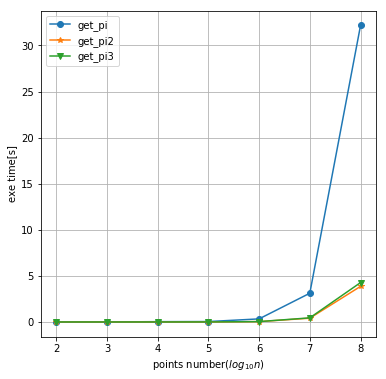

In [6]:
plt.figure(figsize=(6,6))
plt.plot(np.log10(n), np.array(get_pi_list), label="get_pi", marker="o")
plt.plot(np.log10(n), np.array(get_pi2_list), label="get_pi2", marker="*")
plt.plot(np.log10(n), np.array(get_pi3_list), label="get_pi3", marker="v")
plt.xlabel("points number($log_{10}n$)")
plt.ylabel("exe time[s]")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("compare code.png", dpi=400)

In [7]:
def get_pi4(n):
    """
    可視化機能付き関数
    """
    start = time.time()
    x_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=n))
    y_list = np.array(np.random.uniform(low=-1.0, high=1.0, size=n))
    r_list = (x_list**2 + y_list**2) ** 0.5
    r_list = np.where(r_list <= 1, 1, 0)
    cir_point = np.sum(r_list)
    square_point = n
    s_x = []
    s_y = []
    c_x = []
    c_y = []
    for i in range(n):
        if r_list[i] == 0:
            s_x.append(x_list[i])
            s_y.append(y_list[i])
        else:
            c_x.append(x_list[i])
            c_y.append(y_list[i])
    pi = 4*cir_point / square_point
    print("近似した円周率(点が{}個の時): ".format(n), pi)
    print("かかった時間: {}sec".format(time.time() - start))
    print()
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes()
    circle = patches.Circle(xy=(0, 0), radius=1, fill=False, lw=5, edgecolor="b")
    rect = patches.Rectangle(xy=(-1,-1), width=2, height=2, fill=False, lw=5, ec="r")
    ax.add_patch(circle)
    ax.add_patch(rect)
    plt.scatter(s_x, s_y, c="k", s=1)
    plt.scatter(c_x, c_y, c="g", s=1)
    plt.show()

近似した円周率(点が100個の時):  3.0
かかった時間: 0.00042819976806640625sec



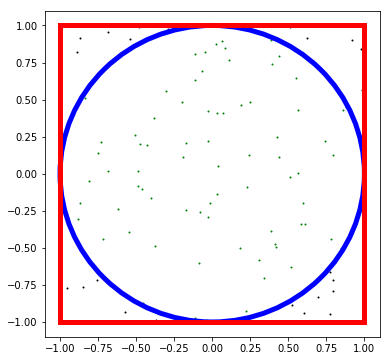

近似した円周率(点が1000個の時):  3.176
かかった時間: 0.0012736320495605469sec



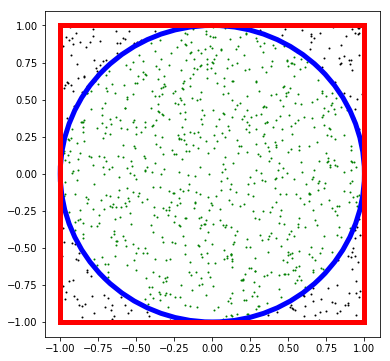

近似した円周率(点が10000個の時):  3.1092
かかった時間: 0.006802082061767578sec



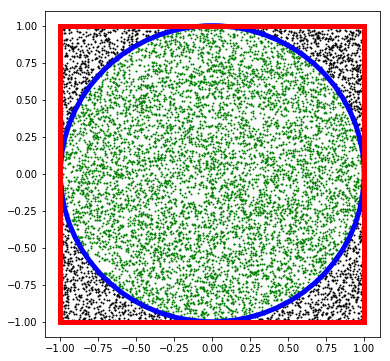

近似した円周率(点が100000個の時):  3.14304
かかった時間: 0.07932782173156738sec



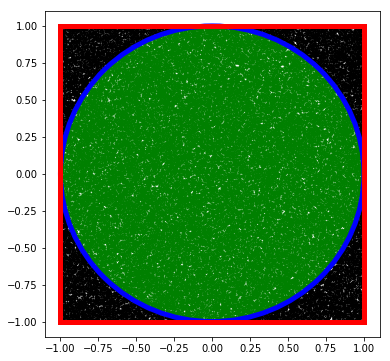

近似した円周率(点が1000000個の時):  3.143124
かかった時間: 0.5702314376831055sec



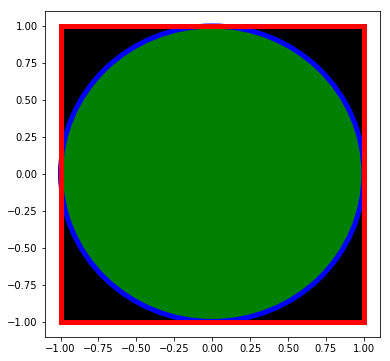

近似した円周率(点が10000000個の時):  3.1414864
かかった時間: 5.555030584335327sec



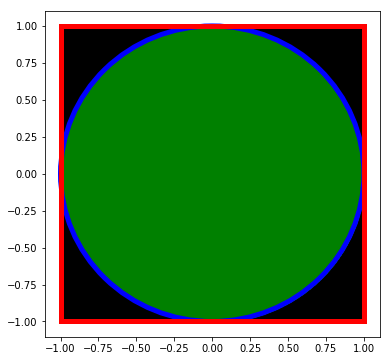

In [8]:
n = [100, 1000, 10000, 100000, 1000000, 10000000]
for i in n:
    get_pi4(i)